In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv ')

In [3]:
prosody_data.head()

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C,Hired5C,Hired6T,Hired01C,Hired4C
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,...,20.106,91,4722.964842,5.106224,1,1,5,0,1,2
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,...,15.886,71,2928.482587,5.106224,1,1,5,0,1,2
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441736,120.457847,...,16.951,79,3528.448990,5.106224,1,1,5,0,1,2
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,...,5.044,36,1924.546685,5.106224,1,1,5,0,1,2
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,...,11.073,19,1322.366516,5.106224,1,1,5,0,1,2


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired3C,Hired5C,Hired6T,Hired01C,Hired4C
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,21.547319,88.869118,5564.506801,4.950746,0.566176,0.992647,4.963235,0.073529,0.661765,1.426471
std,36.117420,0.012226,0.000130,8.332808,41.614286,41.921335,13.154095,76.500370,46.615600,0.795525,...,8.454734,59.178885,4357.018782,0.721579,0.495966,0.818565,0.771435,0.261196,0.473457,0.810756
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,5.044000,11.000000,79.872717,3.189661,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,32.839339,0.002527,0.000065,71.320330,339.477409,124.543847,33.160269,196.724385,113.288462,0.736553,...,15.521250,47.750000,2712.929560,4.529477,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000
50%,49.762437,0.005648,0.000119,73.929065,376.743832,180.010964,40.569432,247.524278,178.438806,1.035074,...,20.215500,76.000000,4520.700221,4.967754,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000
75%,71.724484,0.013414,0.000221,75.644207,397.296921,203.342602,48.220307,293.743385,203.973193,1.350608,...,26.054000,112.250000,7249.827921,5.448852,1.000000,2.000000,5.000000,0.000000,1.000000,2.000000
max,376.992000,0.134692,0.000873,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,53.887000,590.000000,40513.328260,6.647218,1.000000,2.000000,7.000000,1.000000,1.000000,3.000000


Text(0.5, 0, 'Recommend Hiring')

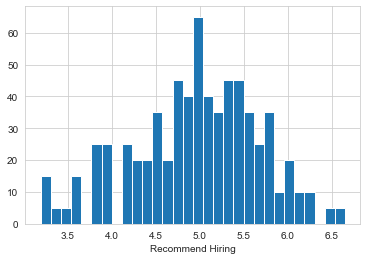

In [6]:
sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('Recommend Hiring')

In [7]:
mRH =prosody_data['Hired3C']

yRH = prosody_data['RecommendHiring']

cRH = prosody_data['Hired']

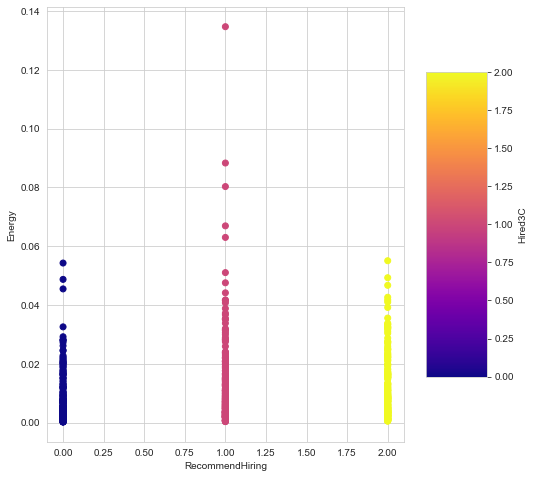

In [8]:
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
sctt = plt.scatter(mRH,x1, c=mRH, cmap= 'plasma')
plt.ylabel('Energy')
plt.xlabel('RecommendHiring')
fig.colorbar(sctt, shrink = 0.7,label = 'Hired3C', aspect = 5)

['Not Qualified', 'Highly Qualified', 'Medium Qualified']
Highly Qualified:  225
Medium Qualified:  225
Not Qualified:  230


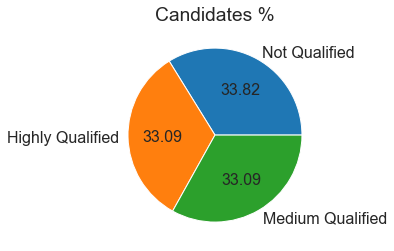

In [18]:
Hr = np.array(prosody_data['Hired3C'].value_counts())
arr = prosody_data['Hired3C']
lb = ['Not Qualified','Highly Qualified','Medium Qualified']
print(lb)
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Candidates %")

arrLB = []
for i in arr:
    if(i==2):
        arrLB.append('Highly Qualified')
    elif(i==1):
        arrLB.append('Medium Qualified')
    else:
        arrLB.append('Not Qualified')
print("Highly Qualified: ",arrLB.count('Highly Qualified'))
print("Medium Qualified: ",arrLB.count('Medium Qualified'))
print("Not Qualified: ",arrLB.count('Not Qualified'))


In [10]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

# Feature Selection Using Kbest

In [11]:
def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    Y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict

# Feature Selection Using Ridge Regression

In [12]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
def select_feature_ridge(prosody_data_y):
    array = prosody_data.values
    X=prosody_data_X
    y=prosody_data_y
    # define model
    ridge_model = Ridge(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    #print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
    #print(scores)
    
    ranks["ridge"] = rank_to_dict(np.abs(scores), prosody_data_X)
    rankDict = {}
    rankDict = ranks["ridge"]
    return rankDict

# Feature Selection Using Lasso

In [13]:
from sklearn.linear_model import Lasso 

def select_feature_lasso(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    y = prosody_data_y
    
    lasso = Lasso(alpha=.5)
    lasso.fit(X, y)

    cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
    rankDict = {}
    rankDict = ranks['Lasso']
    return rankDict

# Making arrays of Top 10 20 30 Features

In [14]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [15]:
prosody_data_X = prosody_data.drop(['participant&question','RecommendHiring','Hired','Hired3C','Hired5C','Hired6T'],axis=1)

# Feature selection for RecommendHiring

In [16]:
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)

#using Kbest
selectedFeatures_RecommendHiring_Kbest=select_feature_kbest(prosody_data_y)
print("\nScores of Features for RecommendHiring Using Kbest")
print(selectedFeatures_RecommendHiring_Kbest.keys())

#Using Lasso
selectedFeatures_RecommendHiring_Lasso=select_feature_lasso(prosody_data_y)
print("\nScores of Features for RecommendHiring using Lasso")
print(selectedFeatures_RecommendHiring_Lasso)

#Using Ridge
selectedFeatures_RecommendHiring_Ridge=select_feature_ridge(prosody_data_y)
print("\nScores of Features for RecommendHiring")
print(selectedFeatures_RecommendHiring_Ridge)


C:\Users\Anagha\anaconda3\envs\tf\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
selectedFeatures_kbest_10_RecommendHiring,selectedFeatures_kbest_20_RecommendHiring,selectedFeatures_kbest_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Kbest)
print("\n\n\nTop 10 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_10_RecommendHiring )
print("\nTop 20 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_20_RecommendHiring )
print("\nTop 30 Selected Features Using kbest for RecommendHiring:",selectedFeatures_kbest_30_RecommendHiring )


selectedFeatures_lasso_10_RecommendHiring,selectedFeatures_lasso_20_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Lasso)
print("\n\n\nTop 10 Selected Features for RecommendHiring Using Lasso:",selectedFeatures_lasso_10_RecommendHiring )
print("\nTop 20 Selected Features For RecommendHiring Using Lasso:",selectedFeatures_lasso_20_RecommendHiring)
print("\nTop 30 Selected Features Using For RecommendHiring Using Lasso:",selectedFeatures_lasso_30_RecommendHiring )

selectedFeatures_ridge_10_RecommendHiring,selectedFeatures_ridge_20_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring= select_features(selectedFeatures_RecommendHiring_Ridge)
print("\n\n\nTop 10 Selected Features For RecommendHiring Using ridge :",selectedFeatures_ridge_10_RecommendHiring )
print("\nTop 20 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_20_RecommendHiring )
print("\nTop 30 Selected For RecommendHiring Features Using ridge:",selectedFeatures_ridge_30_RecommendHiring )


# Common Selected Features For Recommend Hiring

In [ ]:
def IntersecOfSets(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = np.intersect1d(arr1, arr2)
    print(s1)   #['avgVal2' 'f2STD' 'fmean2' 'fmean3' 'pitch_sd']
    result_set = np.intersect1d(s1, arr3)
    print(result_set)
      
    return result_set

In [ ]:
Commonly_selected_Features_RH = []
Commonly_selected_Features_RH = IntersecOfSets(selectedFeatures_kbest_30_RecommendHiring,selectedFeatures_lasso_30_RecommendHiring,selectedFeatures_ridge_30_RecommendHiring)
print(Commonly_selected_Features_RH)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X=prosody_data[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power']]
y=prosody_data[['Hired3C']]

In [ ]:
import plotly.graph_objects as go

import pandas as pd


scaler = MinMaxScaler()

# retrieve just the numeric input values

X[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power']] = scaler.fit_transform(X[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power']])
df = X
print(df[1])
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = mRH,colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [0,1], constraintrange = [1,2], label = 'Average Band1', values = df['avgBand1']),
            dict(range = [0,1], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [0,1], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [0,1], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [0,1], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [0,1], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [0,1], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [0,1], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [0,1], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [0,1], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [0,1], label = 'pitch_quant', values = df['pitch_quant']),              
            dict(range = [0,1], label = 'pitch_sd', values = df['pitch_sd']),            
            dict(range = [0,1], label = 'Power', values = df['power'])
        ])
       
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

# Apply NN model

In [ ]:
def apply_NN_Model(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var):
    scaler = MinMaxScaler()
    X=prosody_data[selectedFeatures_No].values
    X =  scaler.fit_transform(X)
    Y=d_Var
    
    #encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(Y)
    y = encoder.transform(Y)
    
    
    def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    build_model=baseline_model
    estimator = KerasClassifier(build_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(estimator, X, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (cv_results.mean()*100, cv_results.std()*100))
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    #y_pred= cross_val_predict(estimator, X, y, cv=10)
        
    target_names = ['class 0', 'class 1', 'class 2']
        
    print(classification_report(y_test,y_pred,target_names=target_names, zero_division=0))
       
    
    print('MSE',metrics.mean_squared_error(y_test,y_pred))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
       
    return cv_results

In [ ]:
cvscores_NN_RecommendHiring= []
#Using Kbest

cvscore_NN_13_common_RecommendHiring= apply_NN_Model(13,200,300,Commonly_selected_Features_RH,mRH)
cv_MeanVal =(cvscore_NN_13_common_RecommendHiring.mean()*100) 
cv_sdVal = (cvscore_NN_13_common_RecommendHiring.std()*100)
print("CV_Score Fore cvscore_NN_13_common_RecommendHiring : %.2f%% (%.2f%%)" % (cv_MeanVal,cv_sdVal ))
cvscores_NN_RecommendHiring.append(cv_MeanVal)
print(cvscores_NN_RecommendHiring)




In [ ]:
cvscores_NN_RecommendHiring= []
#Using Kbest

cvscore_NN_13_common_RecommendHiring= apply_NN_Model(13,300,500,Commonly_selected_Features_RH,mRH)
cv_MeanVal =(cvscore_NN_13_common_RecommendHiring.mean()*100) 
cv_sdVal = (cvscore_NN_13_common_RecommendHiring.std()*100)
print("CV_Score Fore cvscore_NN_13_common_RecommendHiring : %.2f%% (%.2f%%)" % (cv_MeanVal,cv_sdVal ))
cvscores_NN_RecommendHiring.append(cv_MeanVal)
print(cvscores_NN_RecommendHiring)



In [ ]:
cvscore_NN_30_kbest_RecommendHiring =apply_NN_Model(30,500,500,selectedFeatures_kbest_30_RecommendHiring,mRH)
cv_MeanVal =(cvscore_NN_30_kbest_RecommendHiring.mean()*100) 
cv_sdVal = (cvscore_NN_30_kbest_RecommendHiring.std()*100)
cvscores_NN_RecommendHiring.append(cv_MeanVal)
print(cvscores_NN_RecommendHiring)

In [ ]:
cvscore_NN_20_kbest_RecommendHiring =apply_NN_Model(20,600,600,selectedFeatures_kbest_20_RecommendHiring,mRH)
cv_MeanVal =(cvscore_NN_20_kbest_RecommendHiring.mean()*100) 
cv_sdVal = (cvscore_NN_20_kbest_RecommendHiring.std()*100)
cvscores_NN_RecommendHiring.append(cv_MeanVal)
print(cvscores_NN_RecommendHiring)

In [ ]:
cvscore_NN_30_kbest_RecommendHiring =apply_NN_Model(30,1000,1000,selectedFeatures_kbest_30_RecommendHiring,mRH)
cv_MeanVal =(cvscore_NN_30_kbest_RecommendHiring.mean()*100) 
cv_sdVal = (cvscore_NN_30_kbest_RecommendHiring.std()*100)
cvscores_NN_RecommendHiring.append(cv_MeanVal)
print(cvscores_NN_RecommendHiring)

# Apply RF model

In [ ]:
X=prosody_data[['avgBand1','avgVal2','diffPitchMaxMode','intensityMean','intensityMin'
,'intensityQuant','intensitySD','mean_pitch','pitchUvsVRatio','pitch_abs'
,'pitch_quant','pitch_sd','power']]
y=mRH
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']
        
print(classification_report(y_test,y_pred,target_names=target_names, zero_division=0))


print('MSE',metrics.mean_squared_error(y_test,y_pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
svc_model = SVC(probability=True,kernel= 'poly', C= 1.0, coef0= 10.0,gamma= 0.1, degree= 4)

svc_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']
        
print(classification_report(y_test,y_pred,target_names=target_names, zero_division=0))


print('MSE',metrics.mean_squared_error(y_test,y_pred))

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
